In [1]:
import csv
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [2]:
COL_SECONDS=0
COL_LIMIT=1
COL_THREADS=2
COL_SCHEDULE=3

data_serial={
    "": {}
}

with open('data_cct_mpi.csv', 'r', newline='\n') as csv_file:
    header = True
    data = csv.reader(csv_file, delimiter=';')
    for row in data:
        if header:
            header = False
            continue
            
        
        value_limit = int(row[COL_LIMIT])
        value_threads = int(row[COL_THREADS])
        
        if value_threads == 1:
            value_schedule = row[COL_SCHEDULE]
            data_serial[value_schedule + "_" + str(value_limit)] = float(row[COL_SECONDS])
            
#             print("row", row, "data_serial", data_serial, "value_schedule", value_schedule)            
#             print("row", row, "data_serial", data_serial, "value_schedule", value_schedule)


    
        
#         print(', '.join(row))
#     csv_reader = csv.DictReader(csv_file)
#     for row in csv_reader:
#         print("Row", row['SECONDS'])
#         print("Row", row)

In [3]:
data_list=[]
with open('data_cct_mpi.csv', 'r', newline='\n') as csv_file:
    print("data_serial", data_serial)
    header = True
    data = csv.reader(csv_file, delimiter=';')
    for row in data:
        # skip header         
        if header:
            header = False
            continue
            
        value_limit = int(row[COL_LIMIT])
        row[COL_LIMIT] = value_limit
        row[COL_THREADS] = int(row[COL_THREADS])
#         print("data_serial[value_schedule + "_" + str(value_limit)] ", data_serial[value_schedule + "_" + str(value_limit)] )
        row[COL_SECONDS] = data_serial[row[COL_SCHEDULE] + "_" + str(value_limit)] / float(row[COL_SECONDS])
        
#         print(data_serial[row[COL_SCHEDULE] + "_" + str(row[COL_LIMIT])])
#         print(row, type(row), row[COL_SECONDS], type(row[COL_SECONDS]))
        data_list.append(row)

data_serial {'': {}, 'MPI_100000': 33.47366, 'MPI_300000': 301.330571, 'MPI_600000': 1205.08874}


In [4]:
def filter_date(data, filter_1, col_1, filter_2, col_2):
    new_list = []
    
    for row in data:
#         print('row[col]', row[col], filter_condition, row[col] == filter_condition)
        if row[col_1] == filter_1 and row[col_2] == filter_2:
            new_list.append(row)
    
    return new_list

def filter_value(limit_schedule, col):
    new_list = []
    
    for row in limit_schedule:
        new_list.append(row[col])
    
    return new_list

In [5]:
# for row in data_list:
#     print(row, type(row), row[COL_SECONDS])
dict_schedule = {
    "MPI": { 
        100000: {
            "color":  'yellow',
            "marker": 's',
            "linestyle": 'dashdot',
            "fillstyle": 'left',
        },
        300000: {
            "color":  'blue',
            "marker": 's',
            "linestyle": 'dashdot',
            "fillstyle": 'left',
        },
        600000: {
            "color":  'red',
            "marker": 's',
            "linestyle": 'dashdot',
            "fillstyle": 'left',
        }
    },
    
    
    
#     "auto": { 
#         100000: {
#             "color":  'black',
#             "marker": 'o',
#         },
#         300000: {
#             "color":  'black',
#             "marker": 'p',
#         },
#         600000: {
#             "color":  'black',
#             "marker": 'D',
#         }
#     },
}

list_plot = {}
print("data_list", data_list)

for schedule in dict_schedule:
    limits = dict_schedule[schedule]
    for limit in limits:
        print(schedule, "dict_schedule[schedule]\n", dict_schedule[schedule])
        dict_schedule[schedule][limit]["data"] = filter_date(data_list, limit, COL_LIMIT, schedule, COL_SCHEDULE)
#         print("dict_schedule[schedule][limit][\"data\"]", dict_schedule[schedule][limit]["data"])

# print("dict_schedule", dict_schedule)
# limit_100_static = filter_date(data_list, '100', COL_LIMIT, 'static', COL_SCHEDULE)
# limit_1000_static = filter_date(data_list, '1000', COL_LIMIT, 'static', COL_SCHEDULE)
# limit_10000_static = filter_date(data_list, '10000', COL_LIMIT, 'static', COL_SCHEDULE)
# print("data_limit_1000", limit_1000_static)

# for row in list_plot["100"]:
#     print(row, type(row))
    
# for row in limit_10000_static:
#     print(row, type(row))

# print('----')
# my_list = filter_value(limit_1000_static, COL_SECONDS)
# for row in my_list:
#     print(row, type(row))

data_list [[1.0, 100000, 1, 'MPI'], [1.0, 300000, 1, 'MPI'], [1.0, 600000, 1, 'MPI'], [1.300054792852104, 100000, 2, 'MPI'], [1.3008677638844308, 300000, 2, 'MPI'], [1.3006801125687364, 600000, 2, 'MPI'], [2.1721225734845993, 100000, 4, 'MPI'], [2.185974403335054, 300000, 4, 'MPI'], [2.179518205249261, 600000, 4, 'MPI'], [3.839622058241398, 100000, 8, 'MPI'], [3.90802324613831, 300000, 8, 'MPI'], [3.8895559012949366, 600000, 8, 'MPI'], [6.648677937661408, 100000, 16, 'MPI'], [6.446580756775759, 300000, 16, 'MPI'], [6.513308446832527, 600000, 16, 'MPI'], [6.51192025783373, 100000, 24, 'MPI'], [6.157767936066743, 300000, 24, 'MPI'], [6.016647061164225, 600000, 24, 'MPI']]
MPI dict_schedule[schedule]
 {100000: {'color': 'yellow', 'marker': 's', 'linestyle': 'dashdot', 'fillstyle': 'left'}, 300000: {'color': 'blue', 'marker': 's', 'linestyle': 'dashdot', 'fillstyle': 'left'}, 600000: {'color': 'red', 'marker': 's', 'linestyle': 'dashdot', 'fillstyle': 'left'}}
MPI dict_schedule[schedule]
 

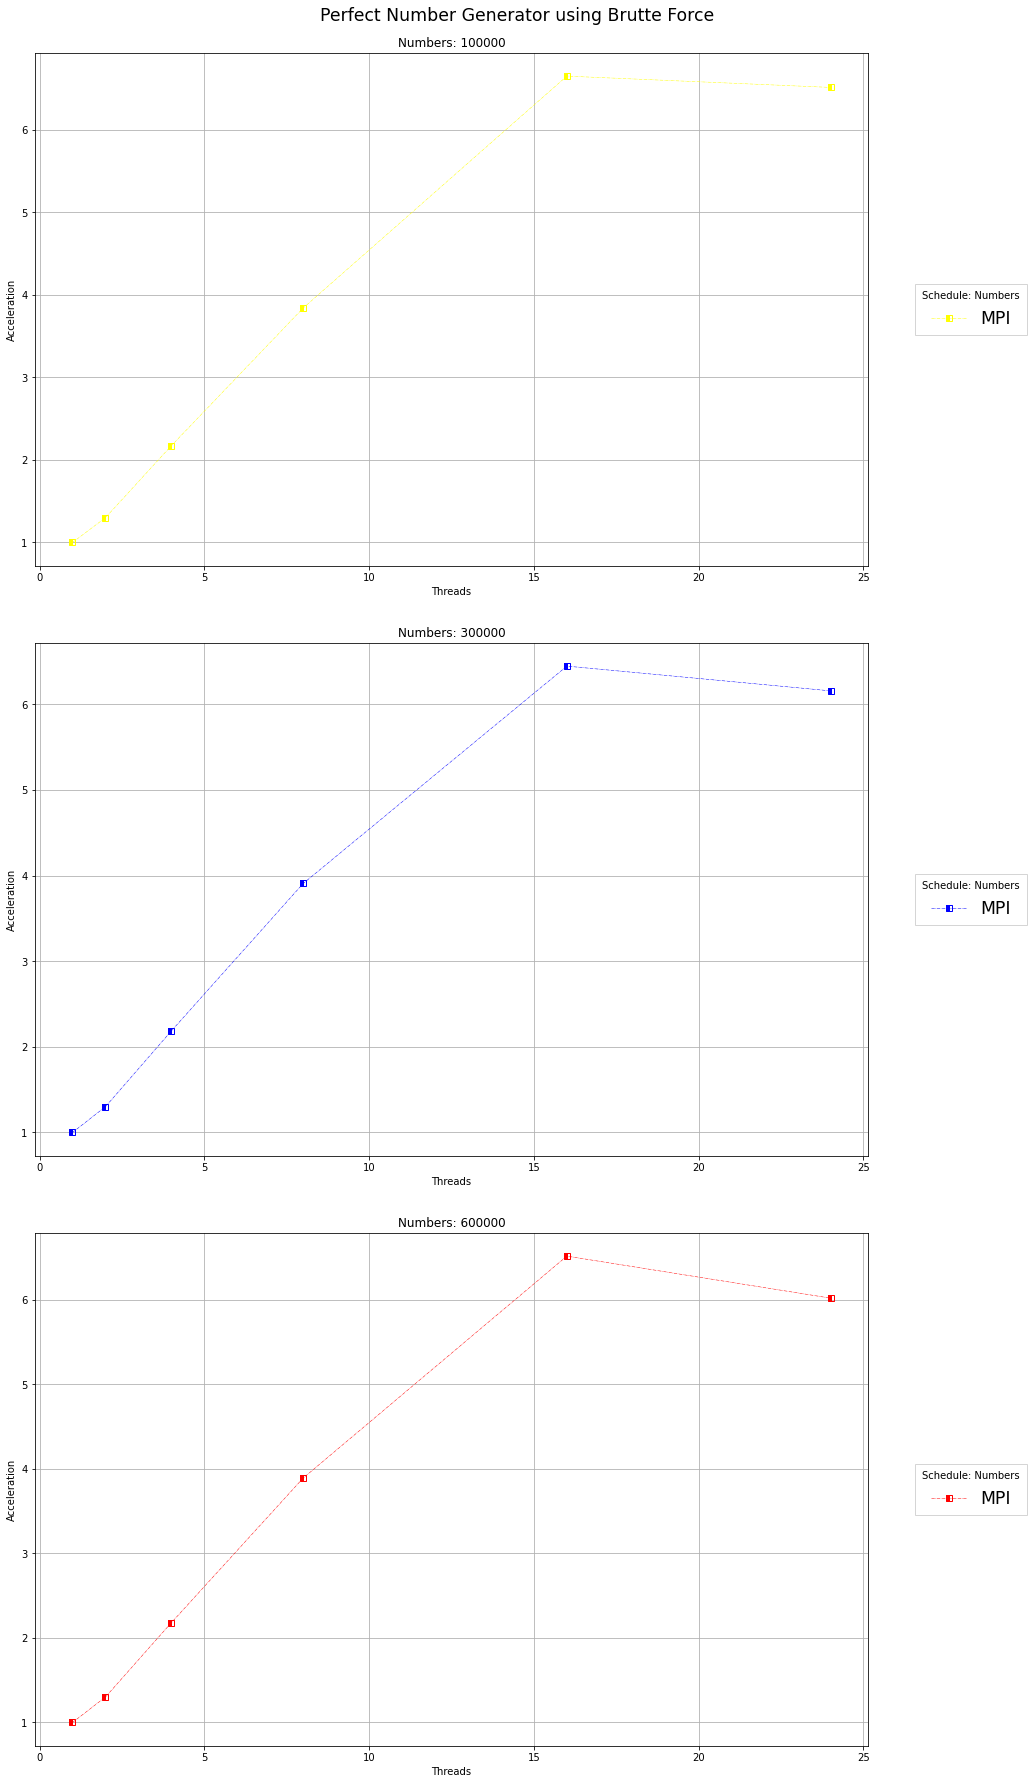

In [6]:
# Oi pessoal. Resumindo: além do código fonte, elaborar um gráfico de aceleração. 
# Eixo X número se threads. Eixo Y aceleração. Os cenários comparativos podem ser baseados na alteração de cláusulas do openmp, na alteração de carga de trabalho, entre outros.

# plt.plot(filter_value(limit_100_static, COL_THREADS), 
#          filter_value(limit_100_static, COL_SECONDS), 
#          color='red', marker='o', label='100')
# plt.plot(filter_value(limit_1000_static, COL_THREADS), 
#          filter_value(limit_1000_static, COL_SECONDS), 
#          color='green', marker='x', label='1000')
# plt.plot(filter_value(limit_10000_static, COL_THREADS), 
#          filter_value(limit_10000_static, COL_SECONDS), 
#          color='blue', marker='+', label='10000')
# plt.figure(figsize=(10,10))
fig, axs = plt.subplots(3)
fig.set_figwidth(15)
fig.set_figheight(25)


for schedule in dict_schedule:
    limits = dict_schedule[schedule]
    count = 0
    
    for limit in limits:
#         print("count", count)
#         if limit != 100000:
#             continue
        value = limits[limit]
#         print("data", value["data"])
        ax = axs[count]
        ax.plot(filter_value(value["data"], COL_THREADS), 
                filter_value(value["data"], COL_SECONDS), 
#                 grid=True,
                color=value['color'], marker=value['marker'], 
                label= schedule, linewidth=0.5,
                fillstyle=value['fillstyle'],
                linestyle=value['linestyle'])
        count+=1
        ax.grid()
        ax.set(xlabel='Threads', ylabel='Acceleration', title="Numbers: " + str(limit))
        ax.legend(bbox_to_anchor=(1.2, 0.5), title="Schedule: Numbers", 
                  loc='center right', fancybox=False,
                  fontsize='xx-large')
#         ax.yscale('linear')
#         ax.label_outer()
    
# plt.ylabel('Seconds')
# plt.xlabel('Threads')
# plt.gca().invert_yaxis()

fig.tight_layout(pad=3.0)
# plt.ylim(0, 1)
# plt.axis([0, 6, 0, 30])
# plt.figure(figsize=(9, 3))
# red_patch = mpatches.Patch(color='red', label='The red data')


# plt.legend(bbox_to_anchor=(1.4, 0.5), title="Schedule: Numbers", 
#            loc='center right', fancybox=False,
#            fontsize='xx-large')
# plt.title("Perfect Number Generator")
fig.suptitle("Perfect Number Generator using Brutte Force", fontsize='xx-large', y=1)
# plt.grid(True)
# plt.ion()
# fig.grid(True)
# plt.axes_size.Fized(4)
# plt.subplot(211)
plt.show()

MPI limits {100000: {'color': 'yellow', 'marker': 's', 'linestyle': 'dashdot', 'fillstyle': 'left', 'data': [[1.0, 100000, 1, 'MPI'], [1.300054792852104, 100000, 2, 'MPI'], [2.1721225734845993, 100000, 4, 'MPI'], [3.839622058241398, 100000, 8, 'MPI'], [6.648677937661408, 100000, 16, 'MPI'], [6.51192025783373, 100000, 24, 'MPI']]}, 300000: {'color': 'blue', 'marker': 's', 'linestyle': 'dashdot', 'fillstyle': 'left', 'data': [[1.0, 300000, 1, 'MPI'], [1.3008677638844308, 300000, 2, 'MPI'], [2.185974403335054, 300000, 4, 'MPI'], [3.90802324613831, 300000, 8, 'MPI'], [6.446580756775759, 300000, 16, 'MPI'], [6.157767936066743, 300000, 24, 'MPI']]}, 600000: {'color': 'red', 'marker': 's', 'linestyle': 'dashdot', 'fillstyle': 'left', 'data': [[1.0, 600000, 1, 'MPI'], [1.3006801125687364, 600000, 2, 'MPI'], [2.179518205249261, 600000, 4, 'MPI'], [3.8895559012949366, 600000, 8, 'MPI'], [6.513308446832527, 600000, 16, 'MPI'], [6.016647061164225, 600000, 24, 'MPI']]}}


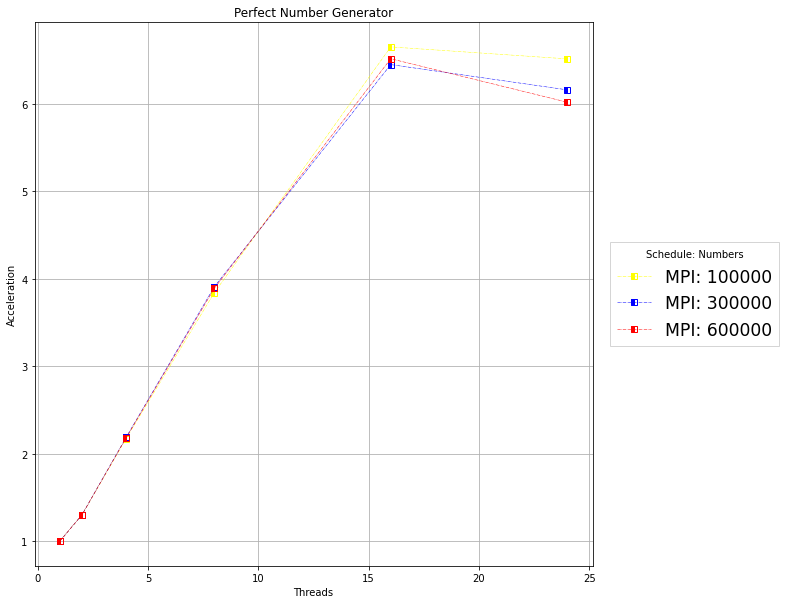

In [11]:
plt.figure(figsize=(10,10))

for schedule in dict_schedule:
    limits = dict_schedule[schedule]
    print(schedule, "limits", limits)
    count = 0
    
    for limit in limits:
#         print("count", count)
#         if limit != 100000:
#             continue
        value = limits[limit]
        plt.plot(filter_value(value["data"], COL_THREADS), 
                filter_value(value["data"], COL_SECONDS), 
#                 scaley=False,
                color=value['color'], marker=value['marker'], 
                label= schedule + ": " + str(limit), linewidth=0.5,
                fillstyle=value['fillstyle'],
                linestyle=value['linestyle'])
#         count+=1
#         ax.set(xlabel='Threads', ylabel='Acceleration', title="Numbers: " + str(limit))
#         ax.legend(bbox_to_anchor=(1.2, 0.5), title="Schedule: Numbers", 
#                   loc='center right', fancybox=False,
#                   fontsize='xx-large')
#         ax.yscale('linear')
#         ax.label_outer()
    
plt.ylabel('Acceleration')
plt.xlabel('Threads')
# plt.gca().invert_yaxis()

# fig.tight_layout(pad=3.0)
# plt.ylim(0, 1)
# plt.axis([0, 6, 0, 30])
# plt.figure(figsize=(9, 3))
# red_patch = mpatches.Patch(color='red', label='The red data')


plt.legend(bbox_to_anchor=(1.35, 0.5), title="Schedule: Numbers", 
           loc='center right', fancybox=False,
           fontsize='xx-large')
plt.title("Perfect Number Generator")
fig.suptitle("Perfect Number Generator using Brutte Force", fontsize='xx-large', y=1)
plt.grid(True)
plt.ion()

# plt.axes_size.Fized(4)
# plt.subplot(211)
plt.show()